

# AMLS Assignment Draft
## Task A_2: CNN on BreastMNIST Dataset

Explore CNN based classifiers on the BreastMNIST dataset.

## Import libraries
The required libraries for this notebook include numpy, matplotlib, tensorflow, medmnist and also a custom built dataload and utility library.

In [8]:
## first enable autoreload during development so latest (new) version local code library is reloaded on execution 
## can be commented out when local code development not happening to avoid overhead
%load_ext autoreload
%autoreload 2

## import libraries
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
## sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## removed MedMNIST as only used in AMLS common library

## local code library
import AMLS_common as ac

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set base parameters
Including hyper parameters and environment specifics

In [9]:
## Initialize parameters
parameter = ac.HyperParameters(learning_rate=0.01, 
                               batch_size=128, 
                               num_epochs=70, 
                               num_filter=64,
                               dropout_rate=0.2,
                               optimise="Adam",
                               loss="binary_crossentropy",
                               default_activation="relu")

## initialise tqdm callback
tqdm_callback = ac.TqdmEpochProgress(total_epochs=parameter.num_epochs)

filebase   = "metrics/"          ## where to store file outputs
verbose    = 1                   ## if value equals 1 then print additional process information in steps below

## Load and preprocess the BreastMNIST Data
We load the dataset.

In [10]:
## Loading the data file using custom MedMINST loader
## data set specific name and then use common library to 
data_flag  = 'breastmnist'       ## defines which dataset to load
result_set = ac.medMNIST_load(data_flag,parameter.batch_size)

## check that the loader returned data correctly and then split out
if result_set != []:
    train_dataset = result_set[0]
    test_dataset  = result_set[1]
    val_dataset   = result_set[2]

if verbose == 1:
    ## print out information on training dataset if verbose set
    print("\nSummary metrics for train_dataset")
    print("type:",type(train_dataset))
    print("length:",len(train_dataset))
    print("shape:",train_dataset)

Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz

Summary metrics for train_dataset
type: <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
length: 5
shape: <BatchDataset shapes: ((None, 28, 28, 1), (None, 1)), types: (tf.float64, tf.float32)>


## Define the CNN model

In [11]:
## Define the model
if verbose == 1:
    print("Default activation is ",parameter.default_activation)

## Define base model
model = Sequential([
    Conv2D(16, (3, 3), activation=parameter.default_activation, input_shape=(28, 28, 1)),  ## Input layer
    Conv2D(32, (3, 3), activation=parameter.default_activation),                           ## Initial convolution layer
    MaxPooling2D((2, 2)),                                                                  ## Down-sample the feature maps
    Conv2D(16, (3, 3), activation=parameter.default_activation),                           ## Another convolution layer
    MaxPooling2D((2, 2)),                                                                  ## Down-sample the feature maps
    Conv2D(16, (3, 3), activation=parameter.default_activation),                           ## Another convolution layer
    MaxPooling2D((2, 2)),                                                                  ## Down-sample the feature maps
    Flatten(),                                                                             ## Flatten
    Dropout(0.2),                                                                          ## Drop out to reduce possible over fitting
    Dense(64, activation=parameter.default_activation),                                    ## Fully connected layer
    Dense(1, activation='sigmoid')                                                         ## Output layer for binary classification  
])

if verbose == 1:
    print(model.summary())
## Redirect the summary output to a string
summary_string = io.StringIO()
model.summary(print_fn=lambda x: summary_string.write(x + "\n"))
summary_content = summary_string.getvalue()
summary_string.close()

Default activation is  relu
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 16)          2320      
_________________________________________________________________
max_pooling2d_5 (MaxPoolin

## Fit the model

Epoch Progress: 100%|██████████| 70/70 [00:45<00:00,  1.52epoch/s, loss=0.282, acc=0.89, val_loss=0.363, val_acc=0.885] 


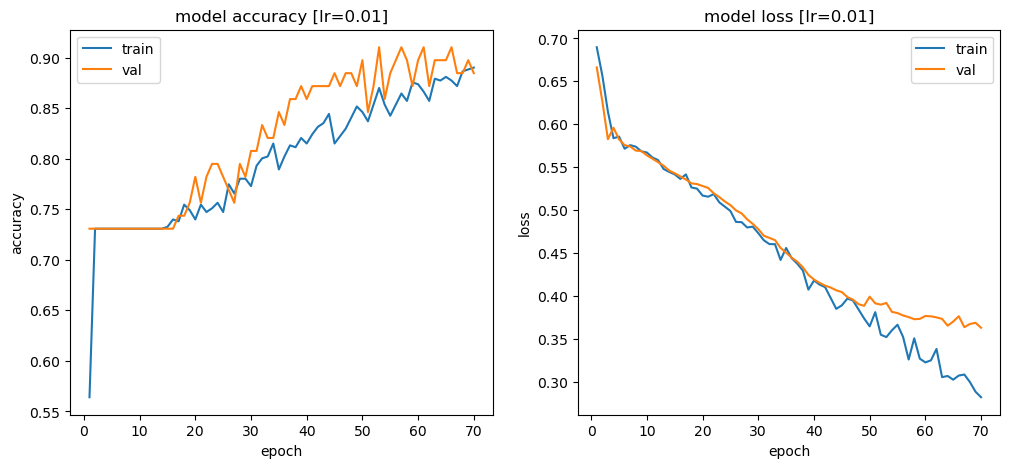

for model
 Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 16)          2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 1

['metrics/metrics_2024_12_27_at_154841.xlsx',
 'metrics/summary_2024_12_27_at_154841.txt',
 RunResult(min_loss=0.28170618414878845, max_acc=0.8901098966598511, last_loss=0.28170618414878845, last_acc=0.8901098966598511, var_loss=0.010104072468834274, var_acc=0.0038215178587370988),
 HyperParameters(learning_rate=0.01, batch_size=128, num_epochs=70, optimise='Adam', loss='binary_crossentropy', num_filter=64, strides=1, padding='valid', dropout_rate=0.2, layers=3, default_activation='relu')]

In [12]:
## set up optimizer with learning rate from hyperparameter structure
##optimizer_choice = str(parameter.optimise)+'(learning_rate='+str(parameter.learning_rate)+')'
##optimizer        = eval(optimizer_choice)
## programatic setting of loss parameter needs more work - not used yet
##loss_choice      = str(parameter.loss)
##loss             = eval(loss_choice)

## how do I update the loss programmatically like learning rate?
model.compile(optimizer=parameter.optimise,                                                   
              loss=parameter.loss,
              metrics='acc')

## Fit the model
history = model.fit(train_dataset, 
                    validation_data=val_dataset, 
                    epochs=parameter.num_epochs, 
                    batch_size=parameter.batch_size, 
                    verbose=0,
                    callbacks = [tqdm_callback])

## output graphically and also save to files
ac.graph_and_save(history,summary_content,parameter,filebase)

